# Function to return ISIS synchrotron beam energy at any time in the machine cycle

> ### *Authors*
>- *Billy Kyle*
>- *Haroon Rafique*
>- *Esher Bansal*

- Note that this an example for a single task or fundamental function. 
- Your notebooks will be smaller / larger dependent on the complexity of the function / goal / class / etc.
- Note also that the energy / momentum before 0 ms and after extraction (usually around 10 ms) are constant and do not in reality follow the output of the below functions
---

#### Goals:
- [x] make a function that returns the ISIS synchrotron ideal energy from 0 - 10 ms in the machine cycle
- [x] function to return ideal energy array the same length as input time array 

---

#### First include all dependencies / libraries

In [1]:
import numpy as np
from scipy.constants import c, m_p, e
import matplotlib.pyplot as plt

---
# Synchrotron Momentum

To calculate the synchrotron momentum at any time in the synchrotron cycle (AKA machine cycle) we calculate the magnetic fields **B$_0$, B$_1$** (technically flux density) at injection and extraction energy required to constrain a proton within the machines aperture (i.e. maintaining a constant bending angle at both energies). These **B** values in an array [**B$_0$, B$_1$**] are then used to define the limits of the idealised magnetic field variation with the AC power supplied to the ISIS main magnets.

#### Function: `synchrotron_momentum(max_E,  time)`
- **Arguments**: 
    - `max_E`: maximum beam energy [MeV]
    - `time`: time selection array [ms]
- **Returns**: 
    - the ideal beam momentum [eV/c] at a given time in the ISIS Rapid Cycling Synchrotron (RCS) cycle in an array the same length as `time`

In [2]:
def synchrotron_momentum(max_E, time):
    mpeV = m_p * c**2 / e           # Proton mass in eV
    R0 = 26                         # Mean machine radius
    n_dip = 10                      # Number of dipoles
    dip_l = 4.4                     # Dipole length
    
    dip_angle = 2 * np.pi / n_dip   # Dipole bending angle
    rho = dip_l / dip_angle         # Dipole radius of curvature
    omega = 2 * np.pi * 50   
    
    Ek = np.array([70, max_E]) * 1e6 # Injection and extraction kinetic energies 
    E = Ek + mpeV                    # Injection and extraction kinetic energies
    p = np.sqrt(E**2 - mpeV**2)      # Injection and extraction momenta

    B = p / c / rho                  # Ideal magnetic field at injection and extraction energies
    
    Bdip = lambda t: (B[1] + B[0] - (B[1] - B[0]) * np.cos(omega * t)) / 2  # Idealised B-field variation with AC
    pdip = lambda t: Bdip(t) * rho * c                                      # Momentum from B-field in MeV
    
    return pdip(time*1E-3)

---
# Synchrotron Energy

To calculate the synchrotron energy (kinetic energy) at any time in the synchrotron cycle (AKA machine cycle) we convert the beam momentum into energy

Relativistic Energy = square root ( momentum squared + mass squared)

$$ E = \sqrt{\left(c^2 p^2 + m^2 c^4\right)}$$

Relativistic Kinetic Energy = Relativistic Energy - mass

$$ E_k = E - m c^2 $$

#### Function: `synchrotron_energy(max_E,  time)`
- **Arguments**: 
    - `max_E`: maximum beam energy [MeV]
    - `time`: time selection array [ms]
- **Returns**: 
    - the expected beam energy at a given time in the ISIS Rapid Cycling Synchrotron (RCS) cycle in an array the same length as `time`

In [3]:
def synchrotron_kinetic_energy(max_E, time):
    mpeV = m_p * c**2 / e           # Proton mass in eV    
    # Relativistic Kinetic Energy = Relativistic Energy - mass
    return (np.sqrt(synchrotron_momentum(max_E, time)**2 + mpeV**2) - mpeV) # Return array in eV
    #return (np.sqrt(synchrotron_momentum(max_E, time)**2 + mpeV**2) - mpeV)/1E6 # Return array in MeV

# Testing

---
#### Make a linearly spaced array of time using numpy.linspace

In [8]:
# uncomment for numpy.linspace manual
# %%html 
# <iframe src="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html" width=864.0 height=576.0></iframe>

time in milliseconds between -0.1 ms and 10.1 ms, consisting of 2200 data points

In [18]:
time_points = 2200

In [19]:
time_array = np.linspace(-0.5, 10.5, time_points)

In [20]:
time_array

array([-0.5       , -0.49499773, -0.48999545, ..., 10.48999545,
       10.49499773, 10.5       ])

Use python assertion to test the length of the time array - this will raise an Assertion Error if you change time_points to not equal 4000

In [21]:
assert len(time_array) == 2200, 'Length of time array is not 2200'

In [22]:
E_max = 800

In [23]:
synchrotron_momentum_array = synchrotron_momentum(E_max, time_array)

In [24]:
synchrotron_kinetic_energy_array = synchrotron_kinetic_energy(E_max, time_array)

#### Plot the data

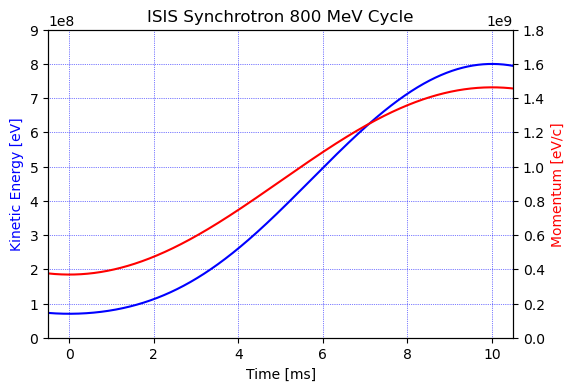

In [25]:
fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=[6, 4])
gs = fig1.add_gridspec(ncols=1,nrows=1, height_ratios=[1])
gs.update(wspace=0.025, hspace=0.)
ax1 = fig1.add_subplot(gs[0,0])
ax2 = ax1.twinx()

ax2.plot(time_array, synchrotron_momentum_array, color='r')
ax2.set_ylabel('Momentum [eV/c]', color='r')
ax2.set_ylim(0, 1.8E9)

ax1.plot(time_array, synchrotron_kinetic_energy_array, color='b')
ax1.set_ylabel('Kinetic Energy [eV]', color='b')
ax1.set_ylim(0, 900E6)

ax1.set_xlim(-0.5, 10.5)
ax1.set_xlabel('Time [ms]')
ax1.set_title('ISIS Synchrotron 800 MeV Cycle')

ax1.grid(True, which='both', ls=':', lw=0.5, color='b')

## Plot in mega and giga electron volts 
- Energy unit = MeV 
- Momentum unit = GeV/c

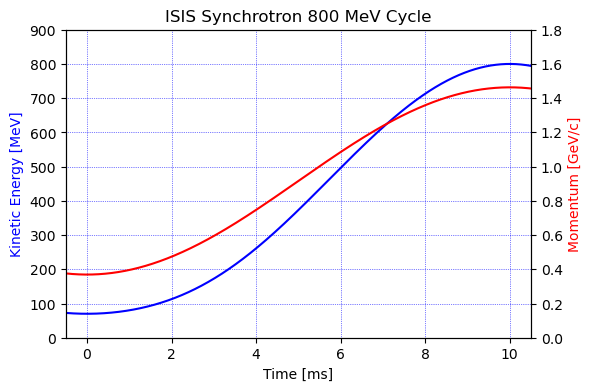

In [26]:
fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=[6, 4])
gs = fig1.add_gridspec(ncols=1,nrows=1, height_ratios=[1])
gs.update(wspace=0.025, hspace=0.)
ax1 = fig1.add_subplot(gs[0,0])
ax2 = ax1.twinx()

ax2.plot(time_array, synchrotron_momentum_array/1E9, color='r')
ax2.set_ylabel('Momentum [GeV/c]', color='r')
ax2.set_ylim(0, 1.8)

ax1.plot(time_array, synchrotron_kinetic_energy_array/1E6, color='b')
ax1.set_ylabel('Kinetic Energy [MeV]', color='b')
ax1.set_ylim(0, 900)

ax1.set_xlim(-0.5, 10.5)
ax1.set_xlabel('Time [ms]')
ax1.set_title('ISIS Synchrotron 800 MeV Cycle')

ax1.grid(True, which='both', ls=':', lw=0.5, color='b')